<a href="https://colab.research.google.com/github/marciofag/ciencia-de-dados-compass-uol/blob/main/modelo_regressao_prever_preco_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações e Amostragem

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
# Carregar o dataset
dataset = pd.read_csv('/content/drive/Othercomputers/Meu computador/projects/_Compass UOL/ciencia-de-dados-compass-uol/projeto2/archive/cars.csv', sep=',', encoding='iso-8859-1')

# Verificar o tamanho da tabela
print(f"Tamanho da tabela: {dataset.shape[0]} registros")

Tamanho da tabela: 762091 registros


In [4]:
# Gerar uma amostra aleatória de 25% dos dados
data_sample = dataset.sample(frac=0.25, random_state=42)

# Verificar o tamanho da amostra
print(f"Tamanho da amostra: {data_sample.shape[0]} registros")

Tamanho da amostra: 190523 registros


# Verificação Inicial dos Dados

In [7]:
# Conferir todas as colunas do arquivo original
data_sample.head(5)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
7532,Acura,TLX V6 w/Technology Package,2019,48266.0,3.5L V6 24V GDI SOHC,9-Speed Automatic,All-wheel Drive,Gasoline,20-29,Platinum White Pearl,Parchment,1.0,1.0,1.0,White Bear Subaru,4.7,4.4,56.0,1000.0,28995.0
336281,Honda,Insight EX,2022,5026.0,1.5L I4 16V MPFI DOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,55-49,White,NaN,0.0,1.0,1.0,Auto Expo 95,NaN,NaN,0.0,2746.0,31995.0
266023,Ford,Mustang EcoBoost,2018,45148.0,"EcoBoost 2.3L I-4 gasoline direct injection, D...",Manual,Rear-wheel Drive,Gasoline,20-28,Ruby Red,Ebony,0.0,0.0,1.0,LAX Chrysler Dodge Jeep RAM,4.8,4.8,192.0,150.0,20350.0
224994,Ford,Expedition EL Limited,2014,160899.0,5.4L V8 24V MPFI SOHC Flexible Fuel,6-Speed Automatic,Four-wheel Drive,E85 Flex Fuel,13-18,Ruby Red Metallic Tinted Clearcoat,Stone,0.0,0.0,1.0,The Bear Lot,NaN,4.5,14.0,600.0,16992.0
132622,Chevrolet,Blazer RS,2019,26245.0,3.6L V6 24V GDI DOHC,9-Speed Automatic,Front-wheel Drive,Gasoline,20-26,Black,Jet Black,1.0,0.0,0.0,Schwieters Chevrolet of Willmar,3.8,4.4,118.0,NaN,34999.0


In [8]:
# Tipo dos dados das colunas
print("Tipos das colunas:")
print(data_sample.dtypes)

Tipos das colunas:
manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object


In [9]:
# Verificar valores ausentes no dataset
print("Valores ausentes por coluna:")
print(data_sample.isnull().sum())

Valores ausentes por coluna:
manufacturer               0
model                      0
year                       0
mileage                  121
engine                  3749
transmission            2493
drivetrain              5400
fuel_type               5742
mpg                    35842
exterior_color          2338
interior_color         14233
accidents_or_damage     6103
one_owner               7940
personal_use_only       6272
seller_name             2198
seller_rating          53573
driver_rating           7996
driver_reviews_num         0
price_drop             88132
price                      0
dtype: int64


# Limpeza e Transformação dos Dados

In [10]:
# Função para extrair o nome principal do veículo
def extract_main_model(model_description):
    # Padrão para identificar o nome do fabricante e modelo principal
    pattern = r'(\w+)\s+(\w+)'
    match = re.match(pattern, model_description)

    if match:
        manufacturer = match.group(1)
        main_model = match.group(2)
        return f"{manufacturer} {main_model}"
    return model_description

# Aplicar a função à coluna 'model' e criar uma nova coluna 'main_model'
data_sample['main_model'] = data_sample['model'].apply(extract_main_model)

# Verificar as primeiras linhas do dataframe
print(data_sample[['model', 'main_model']].head(10))

                              model          main_model
7532    TLX V6 w/Technology Package              TLX V6
336281                   Insight EX          Insight EX
266023             Mustang EcoBoost    Mustang EcoBoost
224994        Expedition EL Limited       Expedition EL
132622                    Blazer RS           Blazer RS
389034     Wrangler Unlimited Sport  Wrangler Unlimited
197522                 F-150 Lariat        F-150 Lariat
723188        Tundra SR5 Double Cab          Tundra SR5
213371       Mustang Mach-E Premium        Mustang Mach
562582              Armada Platinum     Armada Platinum


In [11]:
# Função para extrair informações relevantes do registro do motor
def extract_engine_info(engine_description):
    # Padrão para capacidade do motor e tipo
    capacity_pattern = r'(\d+\.\d+L)'
    type_pattern = r'(I\d|V\d)'
    fuel_pattern = r'(GDI|DOHC|Turbo|Hybrid|Electric|PDI|MPFI|SOHC)'

    # Converter engine_description to a string
    engine_description = str(engine_description)

    capacity = re.search(capacity_pattern, engine_description)
    engine_type = re.search(type_pattern, engine_description)
    fuel_types = re.findall(fuel_pattern, engine_description)

    # Construir descrição padronizada
    short_description = ''
    if capacity:
        short_description += capacity.group(0) + ' '
    if engine_type:
        short_description += engine_type.group(0) + ' '
    if fuel_types:
        short_description += ' '.join(fuel_types)

    return short_description.strip()

# Aplicar a função à coluna 'engine'
data_sample['short_engine'] = data_sample['engine'].apply(extract_engine_info)

# Verificar as primeiras linhas da coluna 'engine'
print(data_sample[['engine', 'short_engine']].head(10).to_string())

                                                                  engine              short_engine
7532                                                3.5L V6 24V GDI SOHC          3.5L V6 GDI SOHC
336281                                      1.5L I4 16V MPFI DOHC Hybrid  1.5L I4 MPFI DOHC Hybrid
266023  EcoBoost 2.3L I-4 gasoline direct injection, DOHC, variable valv                 2.3L DOHC
224994                               5.4L V8 24V MPFI SOHC Flexible Fuel         5.4L V8 MPFI SOHC
132622                                              3.6L V6 24V GDI DOHC          3.6L V6 GDI DOHC
389034                                        2.0L I4 16V GDI DOHC Turbo    2.0L I4 GDI DOHC Turbo
197522                                   3.5L V6 24V PDI DOHC Twin Turbo    3.5L V6 PDI DOHC Turbo
723188                      282.0HP 4.7L 8 Cylinder Engine Gasoline Fuel                      4.7L
213371                                                          Electric                  Electric
562582    

In [12]:
# Converter valores para sim/não
data_sample['accidents_or_damage'] = data_sample['accidents_or_damage'].map({1.0: 'Sim', 0.0: 'Não'})
data_sample.fillna({'accidents_or_damage': 'Não'}, inplace=True)

# Verificar a conversão
print("\nVerificação das primeiras linhas após conversão para texto:")
print(data_sample[['accidents_or_damage']].head())


Verificação das primeiras linhas após conversão para texto:
       accidents_or_damage
7532                   Sim
336281                 Não
266023                 Não
224994                 Não
132622                 Sim


In [14]:
# Manter apenas as colunas relevantes
relevant_data = data_sample[['year', 'mileage', 'manufacturer', 'main_model', 'short_engine', 'transmission', 'accidents_or_damage', 'driver_rating', 'price']]

# Excluir linhas com dados ausentes
relevant_data = relevant_data.dropna(subset=['mileage', 'transmission', 'short_engine'])

# Preencher valores numéricos ausentes com a média, se necessário
relevant_data.fillna(relevant_data.mean(numeric_only=True), inplace=True)

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(relevant_data.isnull().sum().to_string())

# Verificar o tamanho da amostra após a exclusão
print(f"\nTamanho da amostra após a exclusão: {relevant_data.shape[0]} registros")



Valores ausentes por coluna:
year                   0
mileage                0
manufacturer           0
main_model             0
short_engine           0
transmission           0
accidents_or_damage    0
driver_rating          0
price                  0

Tamanho da amostra após a exclusão: 187912 registros


In [21]:
# Tratamento de Outliers na variável 'price'
# Identificar outliers utilizando o método do IQR (Interquartile Range)
Q1 = relevant_data['price'].quantile(0.25)
Q3 = relevant_data['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir um limite para identificar outliers (1.5 vezes o IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = (relevant_data['price'] < lower_bound) | (relevant_data['price'] > upper_bound)
print(f"Número de outliers na variável 'price': {outliers.sum()}")

# Remover outliers
relevant_data = relevant_data[~outliers]

print(f"Tamanho dos dados após remoção de outliers: {relevant_data.shape[0]} registros")

Número de outliers na variável 'price': 0
Tamanho dos dados após remoção de outliers: 175546 registros


# Verificação dos Dados Após Limpeza e Transformação

In [33]:
# Arredonde os valores das colunas de acordo com as regras
relevant_data['mileage'] = relevant_data['mileage'].astype(int)
relevant_data['driver_rating'] = relevant_data['driver_rating'].round(1)
relevant_data['price'] = relevant_data['price'].round(2)

# Conferir as colunas do arquivo após limpeza e transformação dos dados
relevant_data.head(30)

,year,mileage,manufacturer,main_model,short_engine,transmission,accidents_or_damage,driver_rating,price
7532,2019,48266,Acura,TLX V6,3.5L V6 GDI SOHC,9-Speed Automatic,Sim,4.4,28995.0
336281,2022,5026,Honda,Insight EX,1.5L I4 MPFI DOHC Hybrid,Automatic CVT,Não,4.6,31995.0
266023,2018,45148,Ford,Mustang EcoBoost,2.3L DOHC,Manual,Não,4.8,20350.0
224994,2014,160899,Ford,Expedition EL,5.4L V8 MPFI SOHC,6-Speed Automatic,Não,4.5,16992.0
132622,2019,26245,Chevrolet,Blazer RS,3.6L V6 GDI DOHC,9-Speed Automatic,Sim,4.4,34999.0
389034,2021,64368,Jeep,Wrangler Unlimited,2.0L I4 GDI DOHC Turbo,8-Speed Automatic,Sim,4.9,44871.0
723188,2005,240000,Toyota,Tundra SR5,4.7L,5-Speed A/T,Não,4.5,11500.0
213371,2022,1419,Ford,Mustang Mach,Electric,1-Speed Automatic,Não,4.9,52371.0
562582,2018,66153,Nissan,Armada Platinum,5.6L V8 GDI DOHC,7-Speed Automatic,Não,4.7,28991.0
565646,2014,128349,Nissan,Maxima SV,3.5L DOHC,Automatic,Sim,4.7,9999.0


In [31]:
# Verificar o tipo das colunas após a conversão
print("\nTipos das colunas após conversão:")
print(relevant_data.dtypes)


Tipos das colunas após conversão:
year                     int64
mileage                  int64
manufacturer            object
main_model              object
short_engine            object
transmission            object
accidents_or_damage     object
driver_rating          float64
price                  float64
dtype: object


# Estatísticas Descritivas das Variáveis Numéricas e Categóricas

In [34]:
# Identificar variáveis numéricas e categóricas
numerical_vars = relevant_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_vars = relevant_data.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Variáveis Numéricas: {numerical_vars}")
print(f"Variáveis Categóricas: {categorical_vars}")

Variáveis Numéricas: ['year', 'mileage', 'driver_rating', 'price']
Variáveis Categóricas: ['manufacturer', 'main_model', 'short_engine', 'transmission', 'accidents_or_damage']


In [35]:
# Estatísticas descritivas para variáveis numéricas
stats = relevant_data.describe().head(8)

# Arredonde os valores das colunas de acordo com as regras
stats['year'] = stats['year'].astype(int)
stats['mileage'] = stats['mileage'].astype(int)
stats['driver_rating'] = stats['driver_rating'].round(1)
stats['price'] = stats['price'].round(2)

# Imprima a tabela formatada
print(stats.to_string())

         year  mileage  driver_rating      price
count  175546   175546       175546.0  175546.00
mean     2017    58669            4.6   28296.65
std         4    43580            0.3   12597.99
min      1923        0            1.0     259.00
25%      2016    26105            4.5   18995.00
50%      2019    49229            4.7   26731.00
75%      2020    81682            4.8   36399.75
max      2023   999999            5.0   62504.00


In [36]:
# Estatísticas descritivas para variáveis categóricas
print(relevant_data.describe(include=['object']).head().to_string())

       manufacturer      main_model            short_engine       transmission accidents_or_damage
count        175546          175546                  175546             175546              175546
unique           30            3765                     665                635                   2
top            Ford  Grand Cherokee  2.0L I4 GDI DOHC Turbo  6-Speed Automatic                 Não
freq          18128            1802                   18739              36285              134617


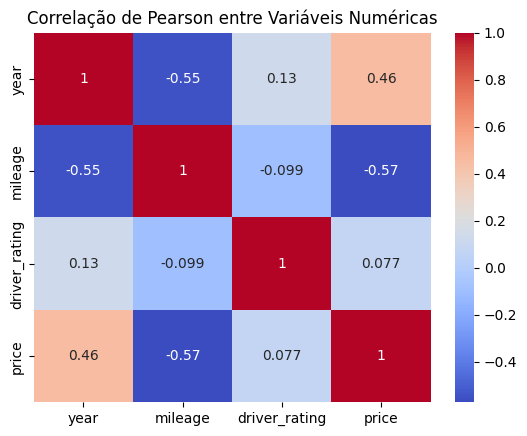

In [ ]:
# Analisar a correlação de Pearson entre variáveis numéricas
corr = relevant_data[numerical_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação de Pearson entre Variáveis Numéricas')
plt.show()

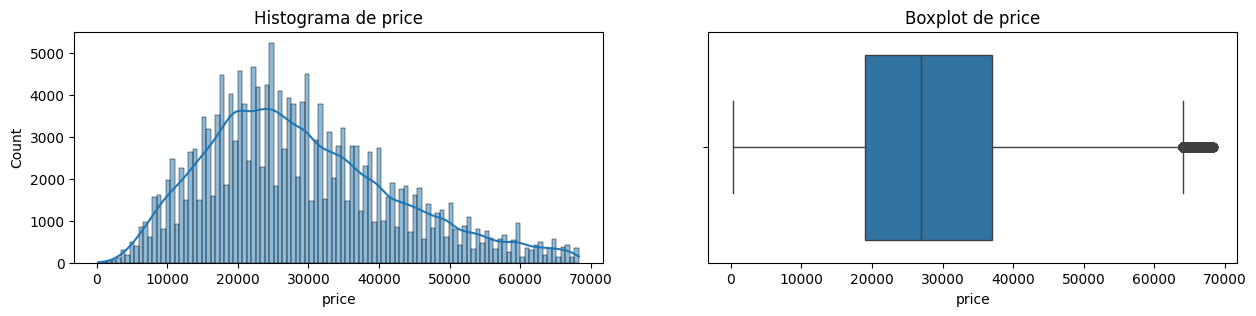

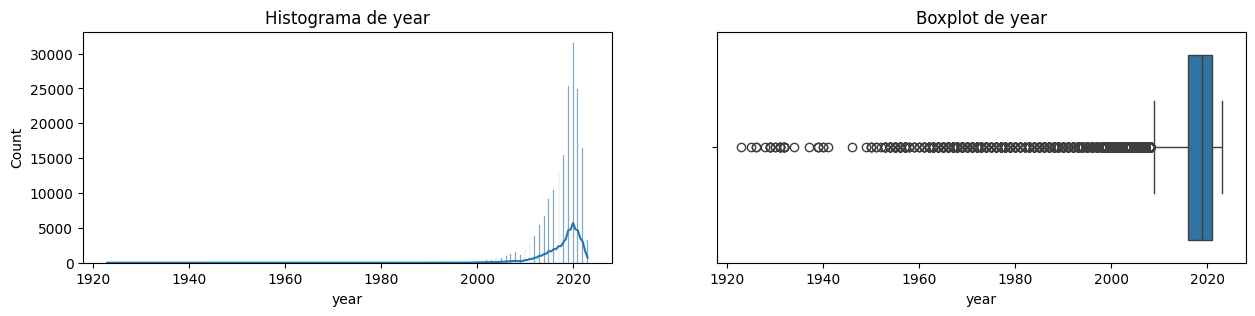

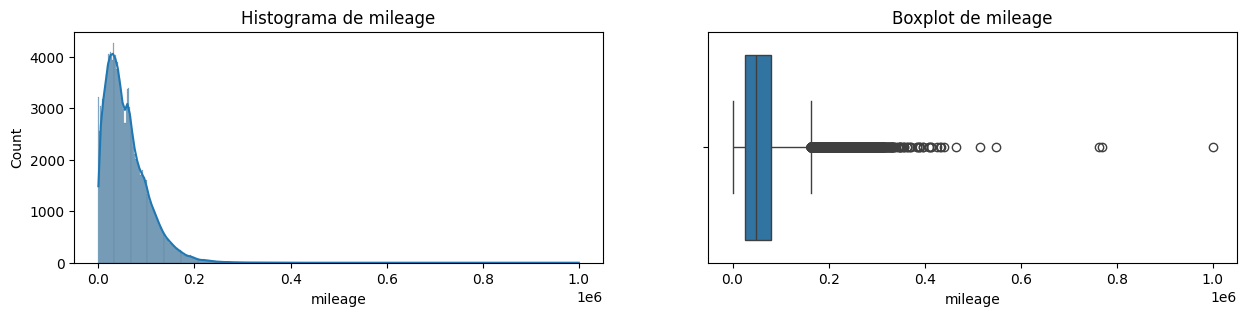

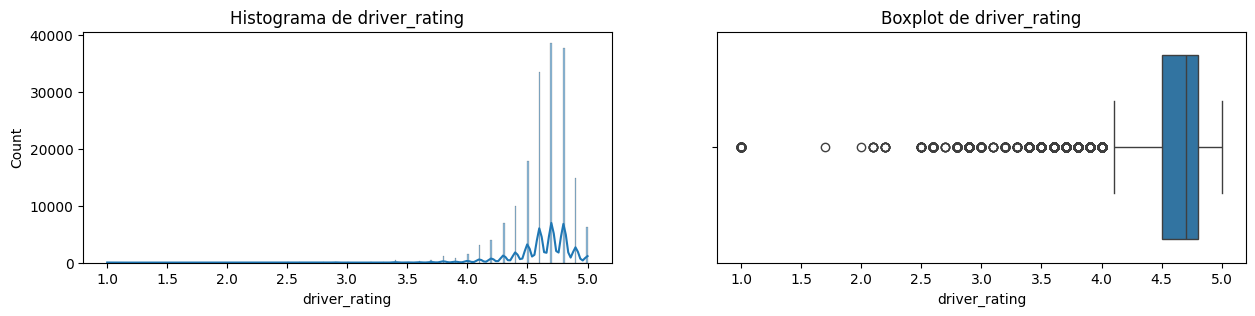

In [ ]:
# Listar variáveis numéricas
numerical_vars_plt = ['price', 'year', 'mileage', 'driver_rating']

# Criar histogramas e boxplots
for var in numerical_vars_plt:
    plt.figure(figsize=(15, 3))

    plt.subplot(1, 2, 1)
    sns.histplot(relevant_data[var], kde=True)
    plt.title(f'Histograma de {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=relevant_data[var])
    plt.title(f'Boxplot de {var}')

    plt.show()


# Modelo de Regressão

In [ ]:
# Importar bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

**Treinamento e Avaliação do Modelo:**

In [ ]:
# Definir as features (X) e a target (y)
X = relevant_data.drop(columns=['price'])
y = relevant_data['price']

# Converter variáveis categóricas em variáveis dummy (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em conjunto de treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Seleção de features
selector = SelectKBest(score_func=f_regression, k=10)  # Escolher 10 melhores features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Modelos para testar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Treinar e avaliar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R^2': r2}
    print(f'{name} - MSE: {mse:.2f}, R^2: {r2:.2f}')

# Mostrar os resultados
print("\nResultados dos modelos:")
for name, metrics in results.items():
    print(f'{name} - MSE: {metrics["MSE"]:.2f}, R^2: {metrics["R^2"]:.2f}')

Linear Regression - MSE: 94261295.45, R^2: 0.48
Ridge Regression - MSE: 94261310.45, R^2: 0.48
Lasso Regression - MSE: 94261322.65, R^2: 0.48

Resultados dos modelos:
Linear Regression - MSE: 94261295.45, R^2: 0.48
Ridge Regression - MSE: 94261310.45, R^2: 0.48
Lasso Regression - MSE: 94261322.65, R^2: 0.48


**Conclusão sobre a Performance do Modelo**

Os valores de Erro Quadrático Médio (MSE) são bastante elevados, o que indica que os erros das previsões do modelo são grandes. Além disso, o Coeficiente de Determinação (R²) é 0.48 para todos os modelos, o que significa que apenas 48% da variabilidade nos preços dos veículos pode ser explicada pelas variáveis independentes incluídas no modelo.

Esses resultados indicam que a performance do modelo não é boa. A baixa proporção de variabilidade explicada (R²) e os altos valores de erro (MSE) sugerem que os modelos não estão capturando bem a relação entre as variáveis preditoras e o preço dos veículos.

**Escolha do Algoritmo**

Dada a análise das métricas, não há uma diferença significativa na performance entre os três modelos testados. No entanto, considerando a simplicidade e a interpretabilidade, a Regressão Linear é uma escolha razoável. A regressão linear padrão é fácil de implementar e interpretar, e oferece uma base para entender a relação entre as variáveis.

**Identificar Variáveis Mais Importantes:**

In [ ]:
# Treinamento do modelo de Regressão Linear (conforme código anterior)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Obter os coeficientes das variáveis
coefficients = pd.Series(linear_model.coef_, index=X_train.columns)

# Filtrar apenas as variáveis numéricas
numeric_features = X_train.select_dtypes(include=[np.number]).columns

# Filtrar os coeficientes das variáveis numéricas
numeric_coefficients = coefficients[numeric_features]

# Ordenar os coeficientes em ordem decrescente
important_numeric_vars = numeric_coefficients.abs().sort_values(ascending=False).head(2)

print("As duas variáveis numéricas mais importantes são:")
print(important_numeric_vars)


As duas variáveis numéricas mais importantes são:
year             1265.597010
driver_rating    1133.070673
dtype: float64


**Interpretação dos Resultados**

De acordo com análises, as duas variáveis numéricas mais importantes são:

- **Ano (year)**: Esta variável tem um coeficiente positivo alto, indicando que quanto mais novo for o veículo, maior será o preço. Cada ano adicional está associado a um aumento de aproximadamente 1265.60 unidades na variável resposta (price).

- **Avaliação do Motorista (driver_rating)**: Esta variável também tem um coeficiente positivo alto, indicando que veículos com avaliações de motorista mais altas tendem a ter preços mais altos. Cada ponto adicional na avaliação do motorista está associado a um aumento de aproximadamente 1133.07 unidades no preço.

**Conclusão**

A partir dos coeficientes do modelo de Regressão Linear, concluímos que as variáveis **ano** e **avaliação do motorista** são as mais importantes para prever o preço dos veículos. Isso faz sentido intuitivamente, pois veículos mais novos geralmente são mais caros, e veículos com melhores avaliações de motorista podem ser percebidos como mais confiáveis e em melhor estado, justificando um preço mais alto.